In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session'
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
df.head()

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Information of the dataset**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df.drop(columns='id',inplace=True)

<Axes: ylabel='count'>

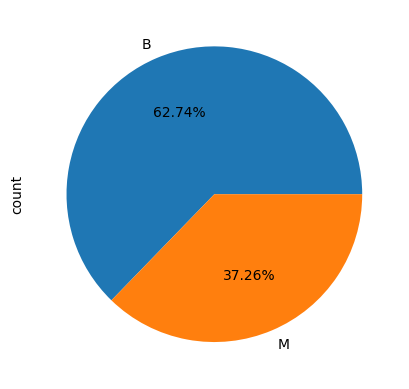

In [5]:
df['diagnosis'].value_counts().plot(kind='pie',autopct='%.2f%%')

**Exploratory Data Analysis (EDA)**

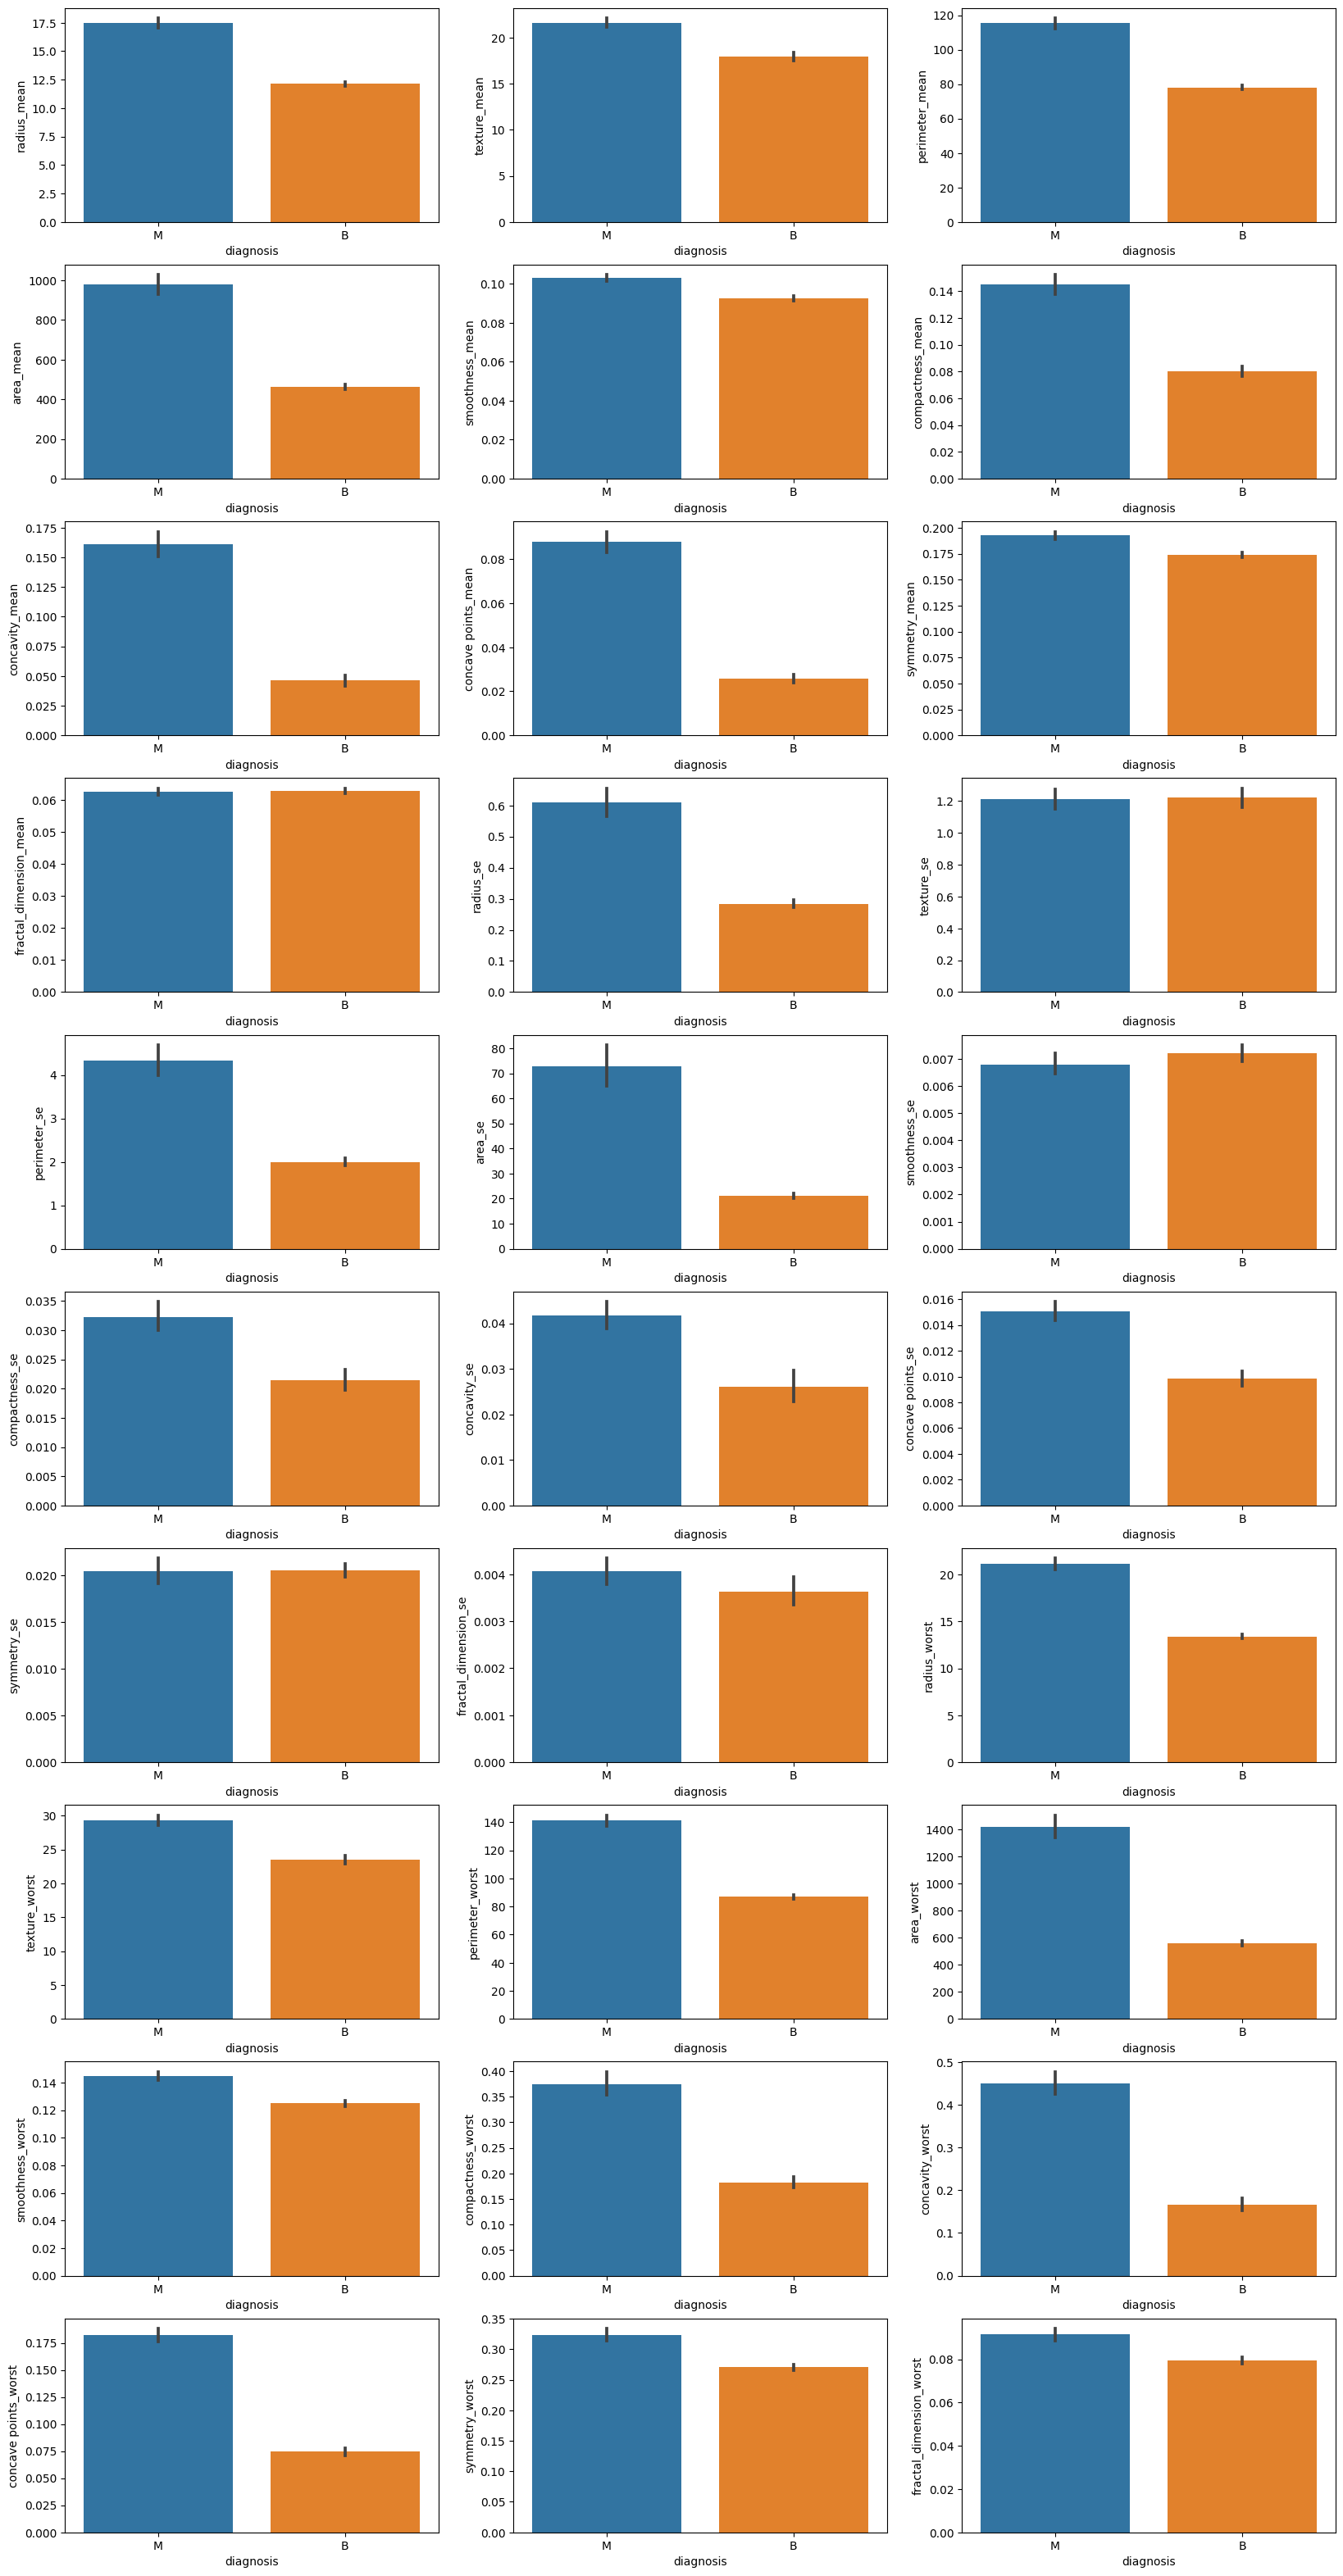

In [6]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.barplot(x='diagnosis',y=col,data=df,ax=ax[i]);

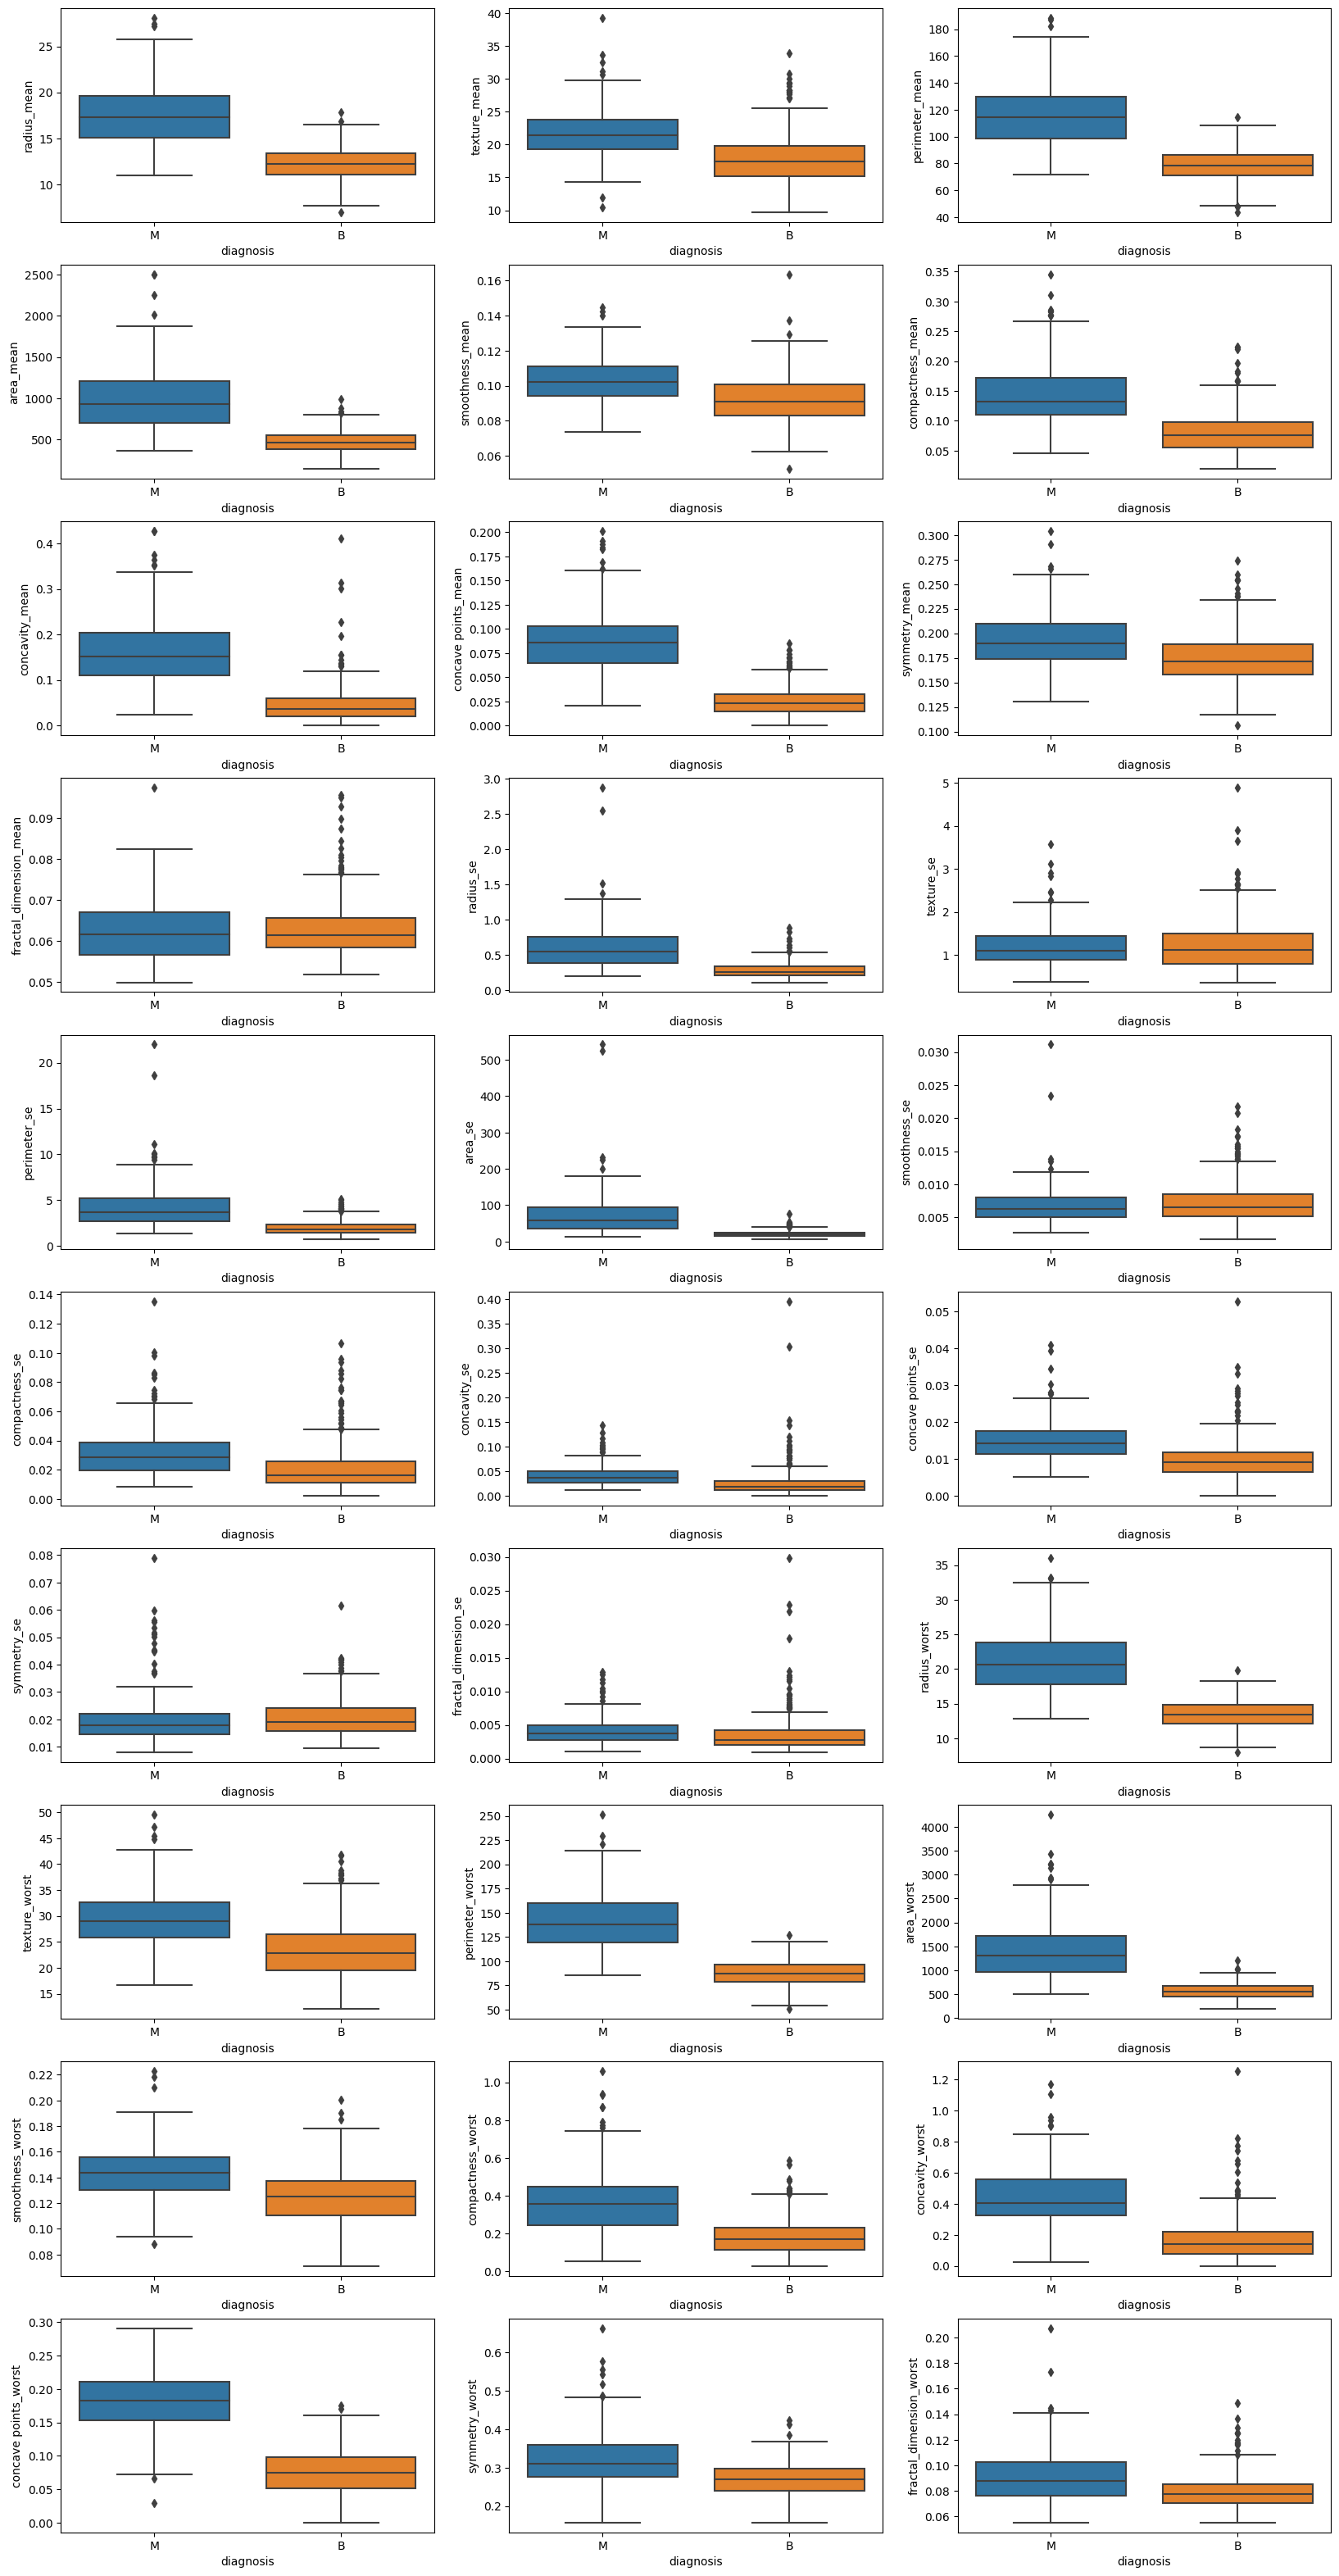

In [7]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.boxplot(x='diagnosis',y=col,data=df,ax=ax[i]);

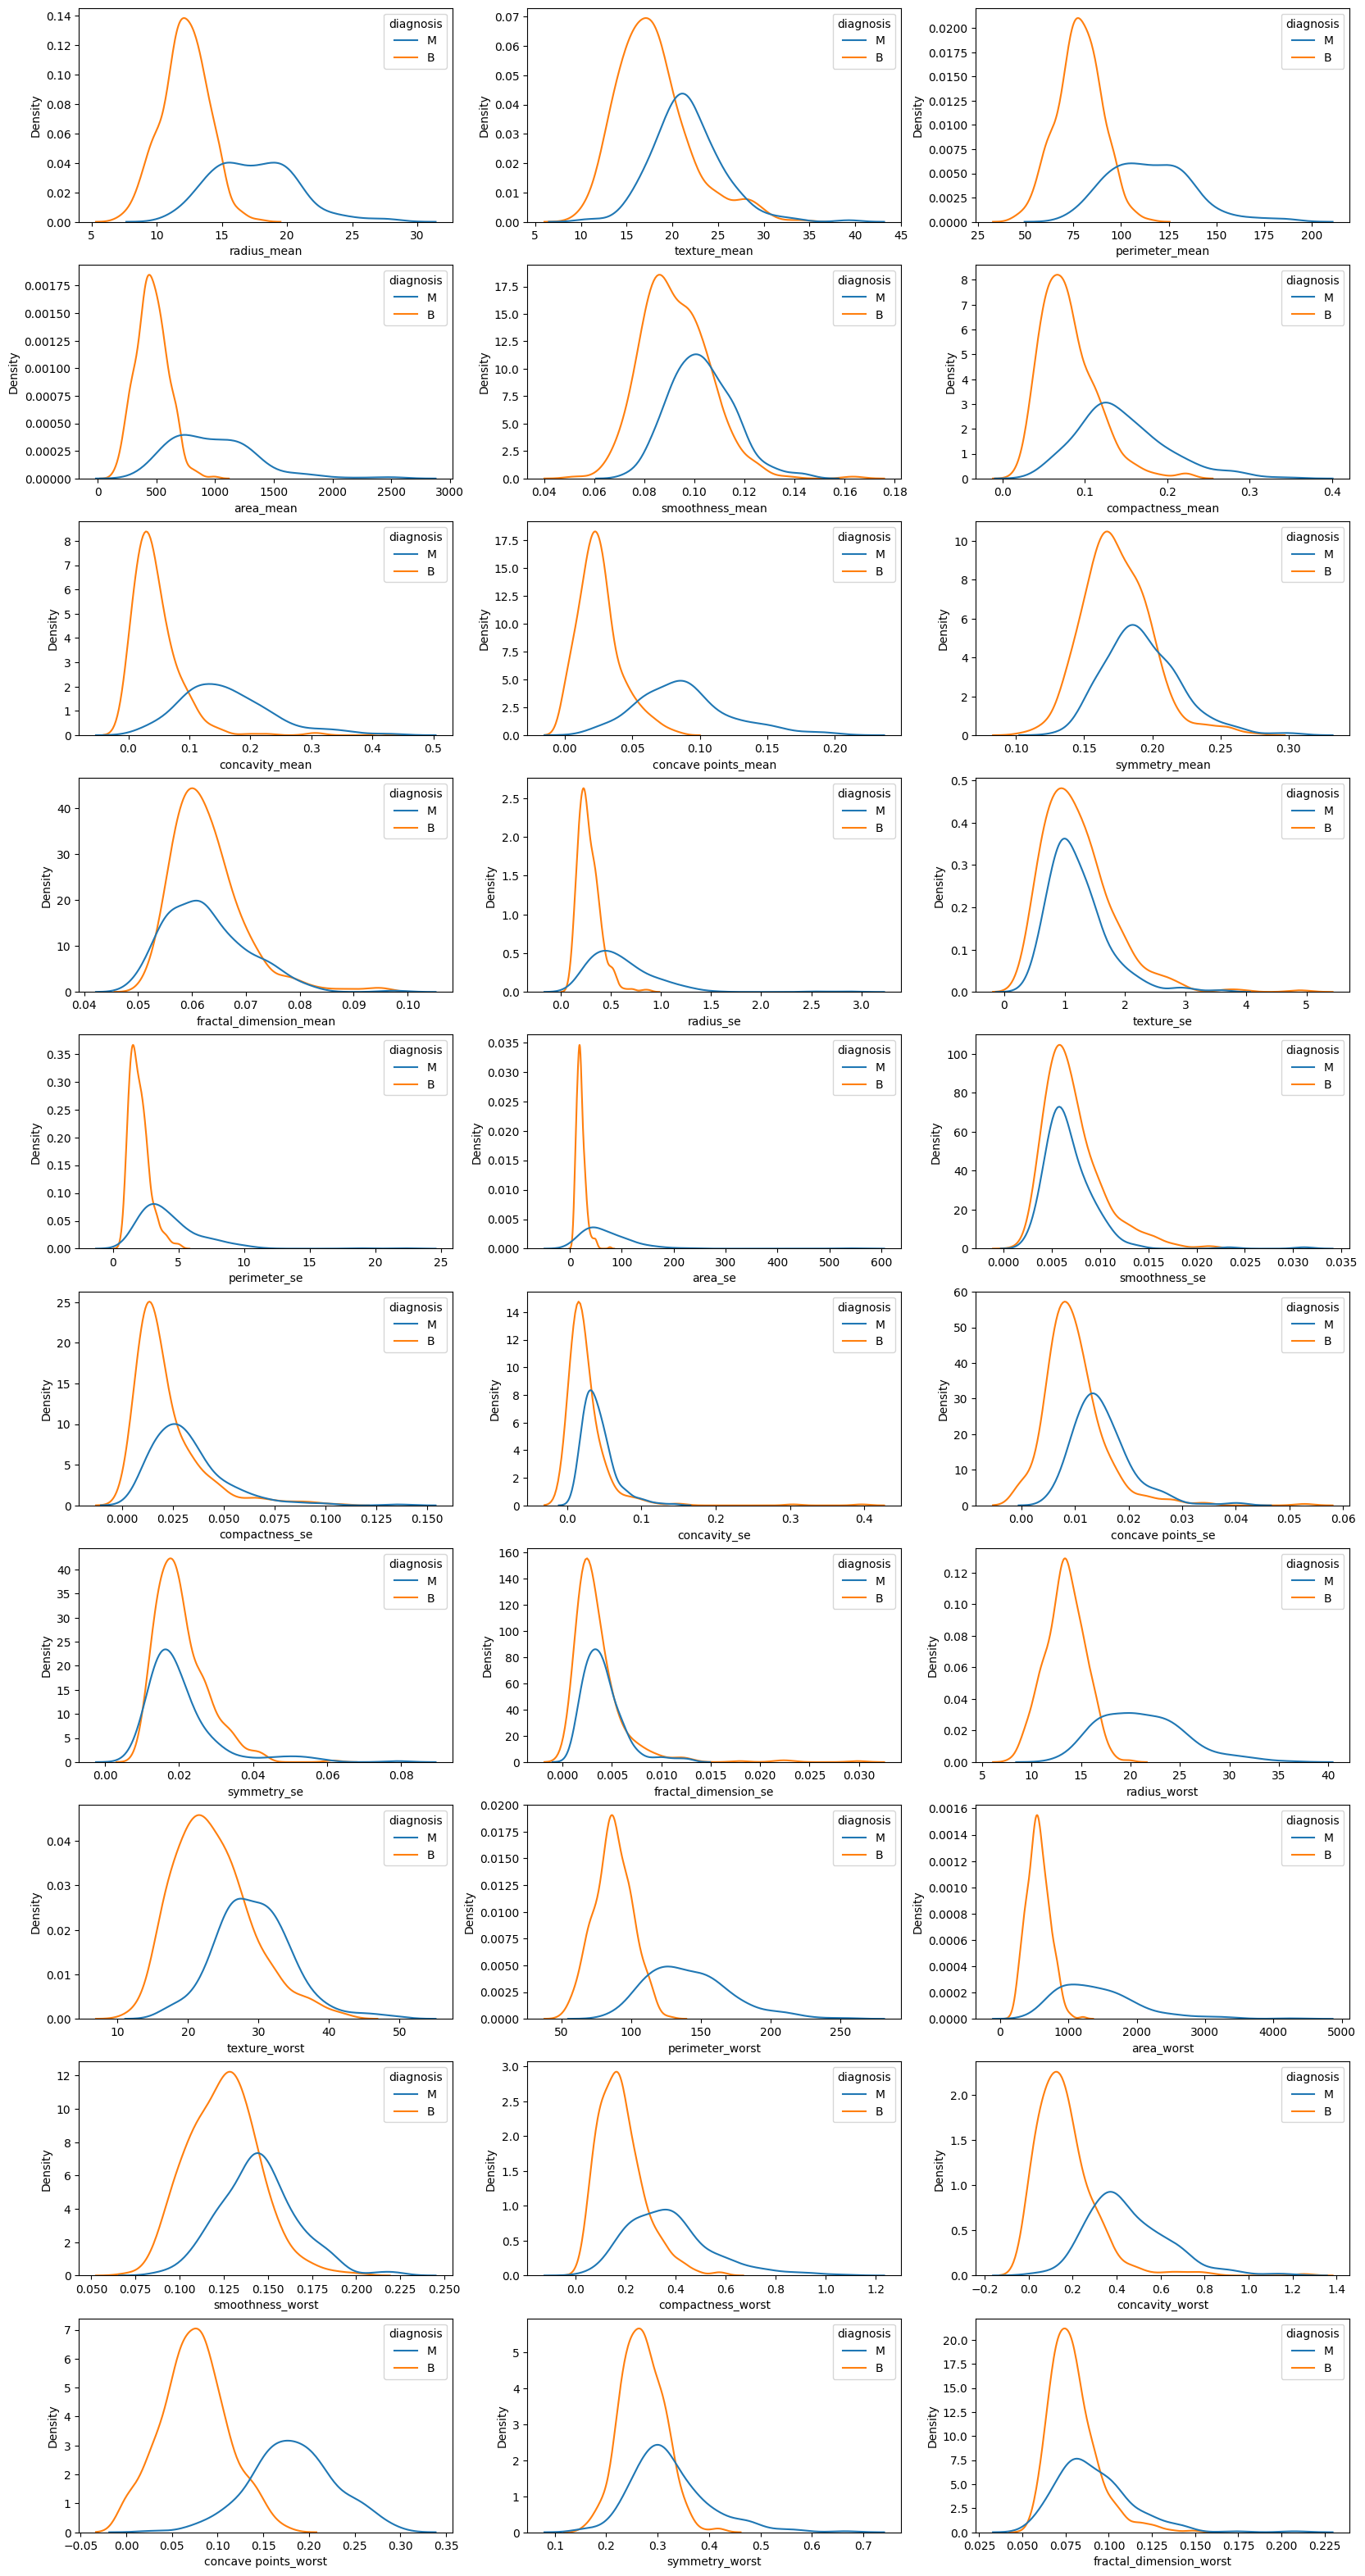

In [8]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.kdeplot(x=col,data=df,ax=ax[i],hue='diagnosis');

In [9]:
X=df.drop(columns='diagnosis')
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Shape of X train :",X_train.shape)
print("Shape of X test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X train : (398, 30)
Shape of X test : (171, 30)
Shape of y_train : (398,)
Shape of y_test : (171,)


**Standardization**

In [10]:
ss=StandardScaler()
X_train=pd.DataFrame(ss.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(ss.transform(X_test),columns=X.columns)

**Transforming target column**

In [11]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

**KNeighborsClassifier**

<Axes: >

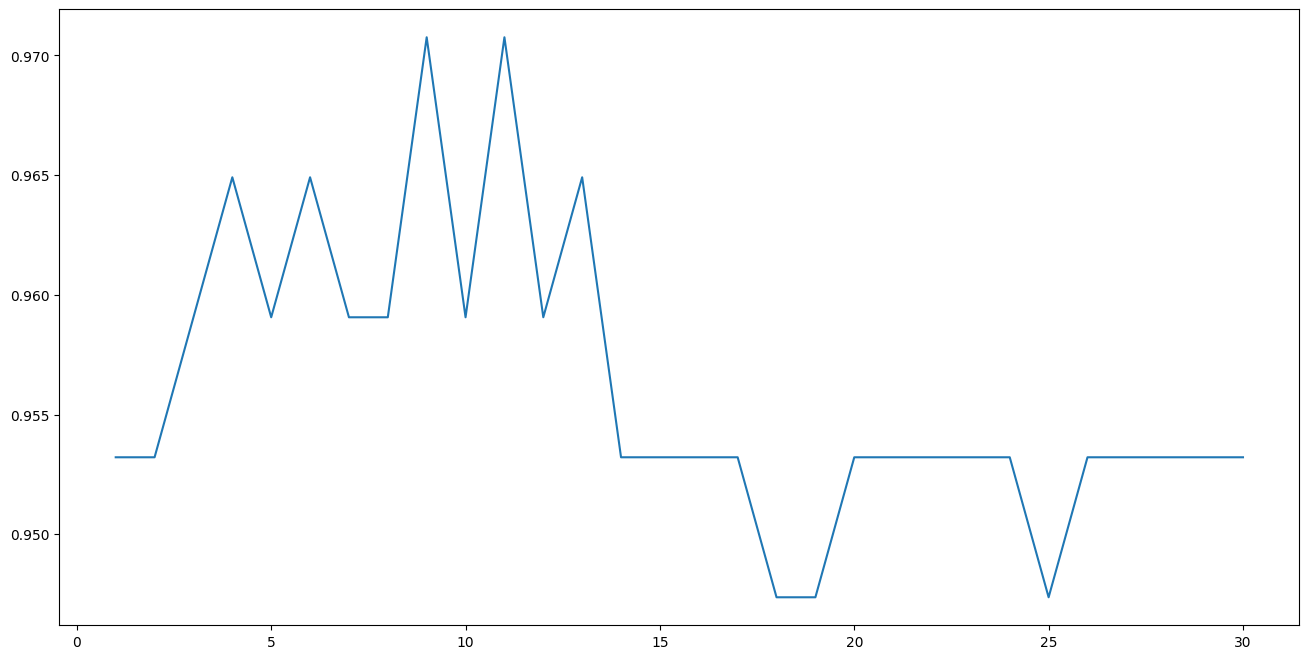

In [12]:
acc_score=[]
n_neighbors=list(range(1,31))

for i in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_test_pred=knn.predict(X_test)
    acc_score.append(accuracy_score(y_test,y_test_pred))
    
plt.figure(figsize=(16,8))
sns.lineplot(x=n_neighbors,y=acc_score)

In [13]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9773869346733668
0.9707602339181286


In [14]:
print("For training dataset:")
print(confusion_matrix(y_train,y_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y_test,y_test_pred))

For training dataset:
[[249   0]
 [  9 140]]
For testing dataset: 
[[106   2]
 [  3  60]]


In [15]:
print("For training dataset:")
print(classification_report(y_train,y_train_pred))
print("For testing dataset: ")
print(classification_report(y_test,y_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       249
           1       1.00      0.94      0.97       149

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398

For testing dataset: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



**LogisticRegression**

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9874371859296482
0.9824561403508771


In [17]:
print("For training dataset:")
print(confusion_matrix(y_train,y_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y_test,y_test_pred))

For training dataset:
[[248   1]
 [  4 145]]
For testing dataset: 
[[106   2]
 [  1  62]]


In [18]:
print("For training dataset:")
print(classification_report(y_train,y_train_pred))
print("For testing dataset: ")
print(classification_report(y_test,y_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       0.99      0.97      0.98       149

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398

For testing dataset: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**Decision Tree Classifier**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)
y_train_pred=dtc.predict(X_train)
y_test_pred=dtc.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9698492462311558
0.9590643274853801


In [20]:
print("For training dataset:")
print(confusion_matrix(y_train,y_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y_test,y_test_pred))

For training dataset:
[[246   3]
 [  9 140]]
For testing dataset: 
[[105   3]
 [  4  59]]


In [21]:
print("For training dataset:")
print(classification_report(y_train,y_train_pred))
print("For testing dataset: ")
print(classification_report(y_test,y_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       249
           1       0.98      0.94      0.96       149

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398

For testing dataset: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [22]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9899497487437185
0.9766081871345029


In [23]:
print("For training dataset:")
print(confusion_matrix(y_train,y_train_pred))
print("For testing dataset: ")
print(confusion_matrix(y_test,y_test_pred))

For training dataset:
[[249   0]
 [  4 145]]
For testing dataset: 
[[106   2]
 [  2  61]]


In [24]:
print("For training dataset:")
print(classification_report(y_train,y_train_pred))
print("For testing dataset: ")
print(classification_report(y_test,y_test_pred))

For training dataset:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       1.00      0.97      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

For testing dataset: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



***Logistic Regression is performing very well with test accuracy 98.24%***

**PLEASE LET ME KNOW IF THERE IS ANY MISTAKE**